# **Installation de Gensim et UMAP**

Si vous n'avez pas encore installé Gensim, vous pouvez le faire en utilisant pip :

In [ ]:
!pip -q install gensim
!pip -q install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 19.4 MB/s eta 0:00:00


In [ ]:
# Importer la bibliothèque gensim pour vérifier sa version.
import gensim

# Afficher la version de spaCy installée.
print(f"Version de gensim installée : {gensim.__version__}")

# Vérifier si la version de gensim est compatible (par exemple >= 4.0).
version_spacy = tuple(map(int, gensim.__version__.split(".")))
if version_spacy >= (4, 0, 0):
    print("Version de gensim compatible ! ✅")
else:
    print("Version de gensim trop ancienne, veuillez mettre à jour à partir de 4.0.0. ❌")

Version de gensim installée : 4.4.0
Version de gensim compatible ! ✅


In [ ]:
import gensim.downloader

# Pour charger le modèle.
w2v_model = gensim.downloader.load('word2vec-google-news-300') # 12 minutes.

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
type(w2v_model)

gensim.models.keyedvectors.KeyedVectors

Le modèle récupéré est un objet de la classe`KeyedVectors`, une classe spécialement conçue pour stocker et manipuler les vecteurs de mots obtenus à partir de modèles comme Word2Vec, FastText, etc.

Voici quelques points clés à propos des `KeyedVectors` :

1. **Stockage des vecteurs de mots** : `KeyedVectors` stocke les vecteurs de mots dans une structure qui permet un accès rapide et efficace aux vecteurs par le biais de mots-clés.

2. **Opérations sur les mots** : Avec `KeyedVectors`, vous pouvez effectuer diverses opérations linguistiques et mathématiques, telles que trouver le mot le plus similaire, calculer la similarité entre deux mots, ou effectuer des analogies de mots (comme "roi" - "homme" + "femme" = "reine").

3. **Indépendance du modèle d'entraînement** : Une fois que les vecteurs sont extraits et stockés dans `KeyedVectors`, ils sont indépendants du modèle d'entraînement. Cela signifie que vous n'avez pas besoin du modèle complet pour manipuler ces vecteurs.

4. **Efficacité en mémoire et vitesse** : Les `KeyedVectors` sont conçus pour être efficaces en termes de mémoire et rapides en termes de récupération des vecteurs, ce qui est essentiel pour les applications en temps réel.

In [ ]:
type(w2v_model)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
# Taille du vocabulaire.
len(w2v_model)

3000000

In [ ]:
# Pour obtenir la représentation vectorielle du mot "étudiant".
w2v_model['student']

array([ 0.03686523,  0.0201416 ,  0.22167969,  0.15527344,  0.17871094,
        0.03149414,  0.31445312, -0.03369141,  0.15429688, -0.375     ,
        0.05102539, -0.13183594, -0.11962891, -0.13867188, -0.02026367,
        0.01318359, -0.06738281, -0.06591797, -0.02502441, -0.140625  ,
        0.02160645,  0.17382812, -0.00177765, -0.09179688, -0.09765625,
       -0.4921875 , -0.13671875, -0.00570679,  0.16992188,  0.10107422,
        0.09423828, -0.10986328, -0.08496094,  0.05419922, -0.06542969,
       -0.0168457 ,  0.11230469,  0.13964844, -0.08300781,  0.22265625,
       -0.23828125,  0.11767578, -0.04614258,  0.0859375 ,  0.17089844,
       -0.06884766,  0.04003906, -0.10351562,  0.15917969,  0.04956055,
       -0.10888672, -0.15039062,  0.01507568, -0.05419922,  0.25      ,
       -0.09521484, -0.11816406,  0.11132812,  0.20507812, -0.10009766,
        0.0168457 , -0.09521484, -0.00308228, -0.01348877,  0.09277344,
       -0.08447266,  0.08496094, -0.05541992,  0.15820312,  0.10

In [ ]:
w2v_model.most_similar('student')

[('students', 0.7294867038726807),
 ('Student', 0.6706662774085999),
 ('teacher', 0.6301366090774536),
 ('stu_dent', 0.6240993142127991),
 ('faculty', 0.6087332963943481),
 ('school', 0.6055627465248108),
 ('undergraduate', 0.6020305752754211),
 ('university', 0.600540041923523),
 ('undergraduates', 0.5755698680877686),
 ('semester', 0.573759913444519)]

# Interprétation
Le modèle a su trouver que les mots les plus similaires à students sont :
- Student
- teacher

Ce qui est bien logique en terme de langage naturel.

In [ ]:
w2v_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

[('queen', 0.7118193507194519)]

# Interprétation
Pour le modèle, “king” est à “queen”, ce que “man” est à “woman”, il suffit d’opérer la même translation, le même glissement sémantique, pour passer de l’un à l’autre.

In [ ]:
# Importer les bibliothèques nécessaires.
import pandas as pd

# Télécharger le fichier directement depuis le lien.
url = "https://cifre.s3.eu-north-1.amazonaws.com/classic4.csv"
df = pd.read_csv(url)

# Afficher les premières lignes du DataFrame.
df.head(3)

,text,label,label_id
0,Williams & Wilkins - The Great Leap Backward\n...,cisi,1
1,the transonic characteristics of 38 cambered r...,cran,2
2,7828. selective cerebral hypothermia physiolo...,med,3


# **Exercice 1: Nettoyage du dataset Classic4**
1. Faites le nécessaire pour nettoyer la colonne `text` en créant une nouvelle colonne nommée `text_clean`.


Ce dataset contient des phrases extraites de documents et annotées avec un label (catégorie). Il sert principalement à entraîner/évaluer des modèles de classification de texte au niveau phrase.


Les 4 labels sont associées à des domaines :
- CACM : informatique / *Communications of the ACM* (IR, systèmes, algorithmes, logiciels)
- CISI : sciences de l’information / bibliothéconomie (recherche d’information, indexation, catalogage)
- CRAN : aéronautique / Cranfield (aérodynamique, propulsion, expérimentations)
- MED : biomédical / Medline (clinique, pharmacologie, essais, symptômes)


In [ ]:
# Import des bibliothèques nécessaires.
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
# Télécharger les ressources NLTK nécessaires.
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
#nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

### Étape 1 : Normalisation du texte

1. Convertir le texte en minuscules pour uniformiser.
2. Supprimer la ponctuation et les caractères spéciaux.

Nous allons commencer par nettoyer chaque phrase de notre jeu de données.

In [ ]:
# Fonction de nettoyage de base.
def text_cleaning(text):

    # Convertir en minuscules.
    text = text.lower()

    # Supprimer la ponctuation et les caractères spéciaux.
    text = re.sub(r'[^\w\s]', '', text)

    return text

In [ ]:
df['text_clean'] = df['text'].apply(text_cleaning)

In [ ]:
df['text_clean']

,text_clean
0,williams wilkins the great leap backward\n ...
1,the transonic characteristics of 38 cambered r...
2,7828 selective cerebral hypothermia physiolog...
3,a study of six universitybased information sys...
4,generation of permutations in lexicographic or...
...,...
7090,interference detection among solids and surfac...
7091,klinik der polyarthrosen\namong the degenerati...
7092,wingflow study of pressure drag reduction at t...
7093,functional adaptations of the right ventricula...


### Étape 2 : Suppression des mots vides (stopwords)

Les mots vides sont des mots courants qui n'ajoutent pas de sens particulier au texte, comme "le", "la", "et". Nous allons les supprimer à l'aide de la liste de stopwords fournie par `nltk`.

In [ ]:
# Charger les stopwords en français.
stop_words = set(stopwords.words('english'))

# Fonction pour supprimer les stopwords.
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)


In [ ]:
df['text_clean'] = df['text_clean'].apply(remove_stopwords)

In [ ]:
df['text_clean']

,text_clean
0,williams wilkins great leap backward article c...
1,transonic characteristics 38 cambered rectangu...
2,7828 selective cerebral hypothermia physiology...
3,study six universitybased information systems ...
4,generation permutations lexicographic order al...
...,...
7090,interference detection among solids surfaces m...
7091,klinik der polyarthrosen among degenerative af...
7092,wingflow study pressure drag reduction transon...
7093,functional adaptations right ventricular outfl...


### Étape 3 : Lemmatisation avec le POS

La lemmatisation ramène les mots à leur forme de base, par exemple "mots" devient "mot". Nous utiliserons le `WordNetLemmatizer` de `nltk` pour effectuer cette tâche.

Cette lemmatisation (avec POS) utilise le POS ( issu du treetagger pour plus de précision)


In [ ]:
# Initialisation du Lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Fonction utilitaire pour convertir les tags NLTK en tags WordNet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_pos(cleaned_text):
    """Lemmatisation précise en utilisant les Part-of-Speech (POS) tags."""
    words = word_tokenize(cleaned_text)

    # Étiquetage POS
    tagged_words = nltk.pos_tag(words)

    lemmatized_words = []
    for word, tag in tagged_words:
        # Conversion du tag
        pos = get_wordnet_pos(tag)
        # Lemmatisation avec le tag POS
        lemma = lemmatizer.lemmatize(word, pos=pos)
        lemmatized_words.append(lemma)

    return ' '.join(lemmatized_words)

In [ ]:
df['text_clean'] = df['text_clean'].apply(lemmatize_pos)

# **Exercice 2 : Afficher les termes dominants de chaque groupe et les visualiser**

#### **Extraction des termes les plus fréquents**

1. Utiliser CountVectorizer ou TfidfVectorizer pour obtenir la fréquence des termes dans les documents (voir TP 1).
2. Identifier les 20 termes les plus importants en utilisant les vrais labels (colonne `label_id`) pour regrouper les documents. L'objectif est de chercher les mots clés de chaque groupe de documents. Pour ce faire, vous pouvez extraire les sous-matrices qui représentent chaque topic, puis calculer la somme ou la moyenne des colonnes. En ordonnant les résultats par ordre croissant, vous obtiendrez l'importance des termes dans chaque topic.

#### **Représentation avec Word2Vec**

1. Obtenir les vecteurs des termes sélectionnés (20 termes par groupe) en utilisant Word2Vec afin de capturer les relations sémantiques entre les termes.

#### **Réduction de dimensions avec ACP**

1. Appliquer l'ACP (Analyse en Composantes Principales) pour réduire les dimensions des vecteurs Word2Vec des top terms à 2 dimensions.
2. Vous pouvez également utiliser des techniques de réduction de dimension non linéaires comme UMAP (Uniform Manifold Approximation and Projection) et t-SNE (t-Distributed Stochastic Neighbor Embedding) pour obtenir des visualisations en 2 dimensions (le code permettant de le faire est fourni).

#### **Visualisation**

1. Créer un scatter plot avec matplotlib ou seaborn.
2. Colorier les termes selon les groupes pour visualiser la répartition des termes.

### **Explication des paramètres (Vous verrez tout cela plus en détail dans les cours de M. Nadif.)**

#### **UMAP (Uniform Manifold Approximation and Projection) :**

- **n_components=2** : Réduit les dimensions à 2 pour permettre une visualisation en 2D.
- **n_neighbors=15** : Nombre de voisins à considérer lors de la construction de la topologie locale.
- **min_dist=0.1** : Distance minimale entre les points dans l'espace de basse dimension.
- **metric='cosine'** : Utilise la distance cosinus comme métrique pour calculer les distances entre les points.

### **t-SNE (t-Distributed Stochastic Neighbor Embedding) :**

- **n_components=2** : Réduit les dimensions à 2 pour permettre une visualisation en 2D.
- **perplexity=30** : Mesure de la perplexité, qui est liée au nombre de voisins les plus proches à considérer.
- **n_iter=300** : Nombre d'itérations pour l'optimisation.
- **metric='cosine'** : Utilise la distance cosinus comme métrique pour calculer les distances entre les points.

# Extraction des termes les plus fréquents

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from gensim.models import KeyedVectors
import gensim.downloader as api
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Utilisation de TfidfVectorizer pour obtenir la fréquence des termes dans les documents
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["text_clean"])
feature_names = np.array(vectorizer.get_feature_names_out())

# Regrouper les documents par label
top_terms_per_label = {}

for label in df["label_id"].unique():
    # Conversion de la série booléenne en tableau numpy pour l'indexation.
    label_mask = (df["label_id"] == label).to_numpy()
    # Sous-matrice correspondant à ce label
    X_label = X[label_mask]

    # Moyenne TF-IDF
    mean_values = np.asarray(X_label.mean(axis=0)).ravel()

    # 2. Identification les 20 termes les plus importants en utilisant les vrais labels
    top_idx = mean_values.argsort()[::-1][:20]
    top_terms = feature_names[top_idx]

    top_terms_per_label[label] = top_terms

# Afficher les termes dominants de chaque groupe
for label, terms in top_terms_per_label.items():
    print(f"Label {label} :")
    print(", ".join(terms))
    print("-" * 50)

Label 1 :
library, information, system, book, index, science, retrieval, research, use, service, scientific, search, document, journal, data, study, literature, user, catalog, need
--------------------------------------------------
Label 2 :
flow, pressure, boundary, layer, number, wing, theory, solution, mach, heat, body, equation, effect, shock, supersonic, result, plate, surface, method, temperature
--------------------------------------------------
Label 3 :
patient, cell, child, case, rat, study, treatment, growth, blood, tissue, acid, normal, disease, increase, hormone, group, cancer, may, effect, renal
--------------------------------------------------
Label 0 :
algorithm, program, system, computer, language, method, use, function, matrix, problem, data, technique, number, describe, structure, algol, polynomial, time, set, paper
--------------------------------------------------


# Représentation avec Word2Vec

In [ ]:
# Charger un modèle préentraîné
w2v_model = api.load("word2vec-google-news-300")

# Créer une matrice des vecteurs des top termes
vectors = []
labels = []
terms = []

for label, words in top_terms_per_label.items():
    for word in words:
        if word in w2v_model.key_to_index:
            vectors.append(w2v_model[word])
            labels.append(label)
            terms.append(word)

vectors = np.array(vectors)

# Réduction de dimension avec PCA

In [ ]:
# PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)


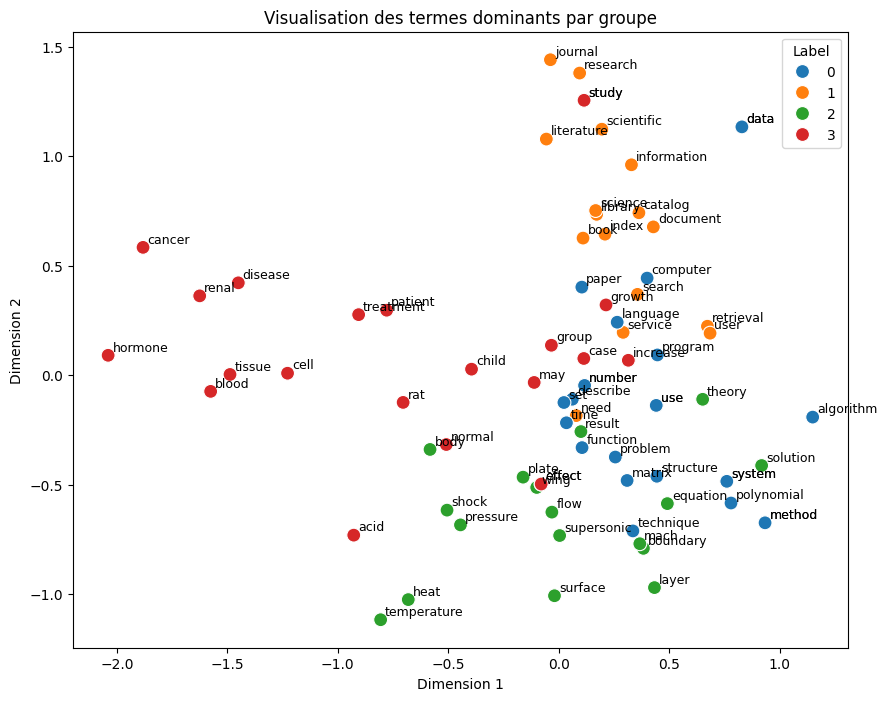

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=vectors_2d[:, 0],
    y=vectors_2d[:, 1],
    hue=labels,
    palette="tab10",
    s=100
)

# Ajouter les annotations des mots
for i, word in enumerate(terms):
    plt.text(vectors_2d[i, 0]+0.02, vectors_2d[i, 1]+0.02, word, fontsize=9)

plt.title("Visualisation des termes dominants par groupe")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Label", loc="best")
plt.show()

## I. Description du Graphique

* **Axes :** Les axes représentent les deux premières dimensions principales (Dimension 1 et Dimension 2) résultantes de l'ACP, qui capturent la **plus grande variance** des données d'origine. Les termes proches dans cet espace 2D sont **sémantiquement ou contextuellement plus similaires** dans notre corpus de texte.
* **Points et Étiquettes :** Chaque point est un **terme** (mot) du corpus, étiqueté par le mot lui-même.
* **Couleurs (Label) :** Les termes sont regroupés en **clusters** (Groupes 0, 1, 2, 3), représentés par différentes couleurs. Ces clusters indiquent des ensembles de mots qui **co-apparaissent** ou sont **conceptuellement proches**.


## II. Interprétation des Clusters (Groupes Thématiques)

L'observation de la position et des termes dans chaque groupe permet de déduire le thème général que chaque cluster représente :

### Groupe 0 (Bleu) : Information et Recherche Générale
Ce groupe est centré sur des concepts liés à l'**information numérique, la recherche, et l'informatique**.
* **Termes Clés :** **`paper`**, **`computer`**, **`function`**, **`method`**
* **Position :** Se trouve principalement dans le quadrant supérieur droit, se chevauchant avec le Groupe 1.

### Groupe 1 (Vert) : Physique, Ingénierie et Méthodes Mathématiques
Ce groupe est caractérisé par des termes techniques et scientifiques, orientés vers les **sciences exactes, l'ingénierie et les méthodes de calcul**.
* **Termes Clés :** **`method`**, **`algorithm`**, **`solution`**, **`system`**, **`equation`**, **`polynomial`**, **`technique`**, **`pressure`**, **`shock`**, **`surface`**, **`layer`**.
* **Position :** Principalement concentré dans la partie inférieure et droite du graphique, avec une forte dispersion sur la Dimension 1 positive.

### Groupe 2 (Orange) : Documentation et Études Académiques
Ce cluster est fortement associé à l'**activité académique, la documentation et les références**.
* **Termes Clés :** **`research`**, **`journal`**, **`literature`**, **`book`**, **`document`**, **`catalog`**, **`index`**, **`scientific`**, **`information`**.
* **Position :** Très regroupé dans le quadrant supérieur droit, avec une forte corrélation positive sur les deux dimensions.

### Groupe 3 (Rouge) : Médecine et Biologie
Ce groupe est clairement thématique, représentant le champ de la **médecine, de la biologie et de la physiologie**.
* **Termes Clés :** **`cancer`**, **`disease`**, **`patient`**, **`treatment`**, **`blood`**, **`tissue`**, **`cell`**, **`hormone`**, **`renal`**, **`rat`**, **`body`**.
* **Position :** Très distinctement séparé à gauche du graphique (Dimension 1 négative), indiquant une **dissimilarité conceptuelle forte** avec les thèmes Information/Académique et Technique.

---


##  Conclusion et Interprétation des Dimensions

* **Séparation sur la Dimension 1 (Horizontale) :** Cette dimension semble séparer les **domaines appliqués/biologiques** (à gauche : Médecine/Biologie) des **domaines de l'information/méthodes** (à droite : Documentation, Informatique, Ingénierie). Une forte valeur négative sur Dim 1 est associée au domaine médical.
* **Séparation sur la Dimension 2 (Verticale) :** Cette dimension semble séparer les **concepts abstraits/documentaires** (en haut : Recherche, Littérature, Information) des **concepts plus physiques/méthodologiques** (en bas : Technique, Méthode, Pression, Température).
* **Qualité du Clustering :** Le clustering est **très efficace**, car les groupes de couleurs correspondent bien aux regroupements sémantiques. Le Groupe 3 (Rouge) est particulièrement bien isolé, soulignant son caractère thématique unique dans le corpus analysé. Certains semblent néanmoins ambigus lors du clustering en raison de leurs **polysémies**.

En résumé, l'ACP a permis de **réduire la complexité du vocabulaire** du corpus en quatre **domaines thématiques principaux** (Médecine, Documentation, Informatique, et Ingénierie/Méthodes) et de visualiser la **distance sémantique** entre ces thèmes.

# UMAP

In [ ]:
vectors_2d_umap = umap.UMAP(n_neighbors=10, min_dist=0.3, metric='cosine').fit_transform(vectors)


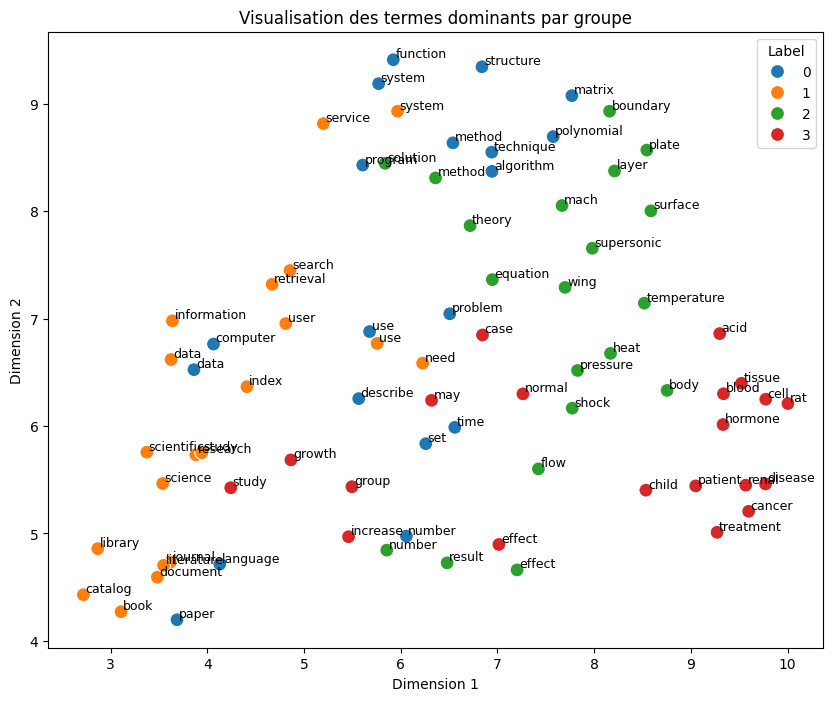

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=vectors_2d_umap[:, 0],
    y=vectors_2d_umap[:, 1],
    hue=labels,
    palette="tab10",
    s=100
)

# Ajouter les annotations des mots
for i, word in enumerate(terms):
    plt.text(vectors_2d_umap[i, 0]+0.02, vectors_2d_umap[i, 1]+0.02, word, fontsize=9)

plt.title("Visualisation des termes dominants par groupe")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Label", loc="best")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap


# w2v_vectors --> la matrice des vecteurs.
# t-SNE avec différentes valeurs de perplexity
perplexities = [5, 10, 20, 50]
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300,
                metric='cosine', random_state=75006)
    tsne_result = tsne.fit_transform(w2v_model)
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=10)
    plt.title(f't-SNE avec perplexity={perplexity}')
    plt.show()

# UMAP avec différentes valeurs de n_neighbors.
n_neighbors_values = [5, 10, 20, 50]
for n_neighbors in n_neighbors_values:
    umap_reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors,
                             min_dist=0.1, metric='cosine', random_state=75006)
    umap_result = umap_reducer.fit_transform(w2v_vectors)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], s=10)
    plt.title(f'UMAP avec n_neighbors={n_neighbors}')
    plt.show()

# A vous de jouer

# **Vectorisation des documents**

Nous devons créer une fonction qui transforme une liste de $n$ documents en une matrice $X$ de taille $n \times d$, $d$ étant le nombre de dimensions du modèle d'embedding.

Étant donné un modèle d'embedding (par exemple, word2vec), chaque document est vectorisé de la manière suivante :
1. Le document est tokenisé (divisé en mots) et nettoyé.
2. Un vecteur de taille $d$ est calculé pour chaque mot.
3. Les vecteurs des mots sont agregés ensemble pour former un seul vecteur de taille $d$.

In [ ]:
from gensim.models import Word2Vec
import numpy as np


def vectorize_documents(tokenized_documents, w2v_model, aggregation_method='mean'):
    """
    Transforme une liste de documents tokenisés en une matrice de vecteurs en utilisant un modèle Word2Vec.
    Chaque document est représenté soit par la moyenne, soit par la somme des vecteurs de ses tokens.

    Args:
        tokenized_documents: Liste de documents tokenisés (chaque document est une liste de tokens).
        w2v_model: Modèle Word2Vec utilisé pour la vectorisation.
        aggregation_method: Méthode d'agrégation à utiliser, soit 'mean' pour la moyenne ou 'sum' pour la somme.

    Returns:
        np.array: Matrice de taille n x d, où n est le nombre de documents et d est le nombre de dimensions du modèle Word2Vec.
    """
    vectorized_docs = []

    for tokens in tokenized_documents:

        # Filtrage des tokens qui sont dans le modèle Word2Vec.
        word_vectors = [w2v_model[token] for token in tokens if token in w2v_model]

        # Moyenne ou somme des vecteurs des tokens pour obtenir le vecteur du document.
        if len(word_vectors) > 0:
            if aggregation_method == 'sum':
                doc_vector = np.sum(word_vectors, axis=0)
            else:
                doc_vector = np.mean(word_vectors, axis=0)  # Par défaut, on utilise la moyenne.
        else:
            # Gérer le cas où aucun token n'est dans le modèle.
            doc_vector = np.zeros(w2v_model.vector_size)

        vectorized_docs.append(doc_vector)

    return np.array(vectorized_docs)

# **Exercice 3 : Visualisation de documents par somme des tokens vs. moyenne.**

1. Visualiser des documents textuels (la colonne `text_clean`) avec une ACP en représentant les documents par la somme et par la moyenne en se basant sur la fonction `vectorize_documents`.

In [ ]:
X_sum = vectorize_documents(df['text_clean'], w2v_model, aggregation_method='sum')
X_mean = vectorize_documents(df['text_clean'], w2v_model, aggregation_method='mean')

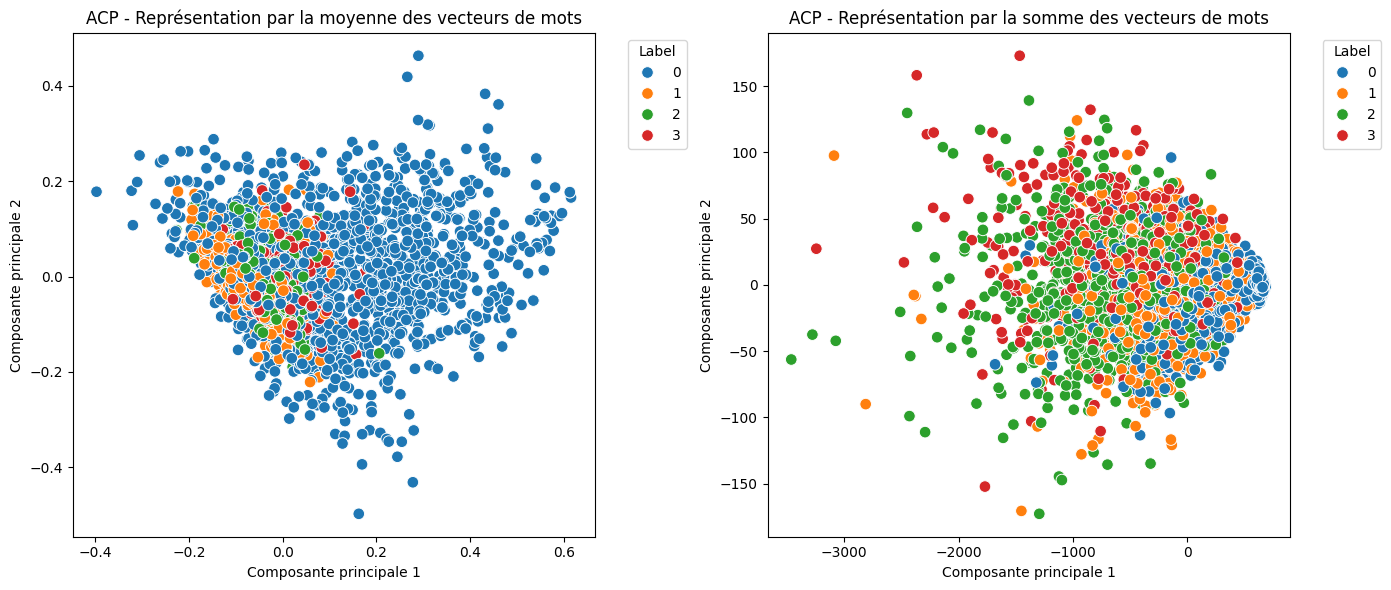

In [ ]:
# ---. Réduction de dimension avec ACP
pca = PCA(n_components=2)
X_mean_2d = pca.fit_transform(X_mean)
X_sum_2d  = pca.fit_transform(X_sum)

# ---. Visualisation
plt.figure(figsize=(14, 6))

# Représentation moyenne
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=X_mean_2d[:, 0], y=X_mean_2d[:, 1],
    hue=df["label_id"], palette="tab10", s=70
)
plt.title("ACP - Représentation par la moyenne des vecteurs de mots")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')

# Représentation somme
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_sum_2d[:, 0], y=X_sum_2d[:, 1],
    hue=df["label_id"], palette="tab10", s=70
)
plt.title("ACP - Représentation par la somme des vecteurs de mots")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# **Interprétation**

En partant des données entières, la PCA n'a pas su séparer les labels ( groupes thématiques). Cela suppose que les groupes ne sont pas linéairement séparables et/ou que deux variables n'expliquent à elles seules une bonne partie des données.

# **Exercice 4 : Clustering de documents avec k-means**

L'objectif de cet exercice est de catégoriser des documents textuels en utilisant l'algorithme de clustering k-means sur la matrice \( X \) des vecteurs de documents. Ensuite, visualisez les résultats en colorant les points dans un graphique 2D selon les clusters obtenus.

#### **Application de k-means** :
   1. Utiliser l'algorithme k-means pour grouper les documents en 5 clusters (sur les 2 matrices: somme vs. moyenne).

#### **Visualisation avec clusters** :
   1. Réaliser des visualisations 2D de la matrice $X$ (réduite via ACP, UMAP et t-SNE).
   2. Cette fois, colorier les points en fonction des clusters obtenus par k-means.
   3. Analyser la répartition des clusters sur le plot.

#### **Évaluation et interprétation** :
   1. Comparer les versions compressées (somme vs moyenne des embeddings) et déterminez laquelle représente le mieux les données originales.
   2. Utiliser la matrice de confusion pour évaluer la correspondance entre les clusters k-means et les étiquettes réelles.
   3. Réfléchisser aux thèmes ou sujets principaux présents dans chaque cluster.
   

**Ressources pour vous aider :**

- Scikit-learn offre une documentation complète sur K-means, avec des exemples, [Lien vers la documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).


# K-means sur les deux représentations

In [44]:
from sklearn.cluster import KMeans

# Nombre de clusters
k = 5

# --- Clustering sur la représentation "moyenne"
kmeans_mean = KMeans(n_clusters=k, random_state=42)
clusters_mean = kmeans_mean.fit_predict(X_mean)

# --- Clustering sur la représentation "somme"
kmeans_sum = KMeans(n_clusters=k, random_state=42)
clusters_sum = kmeans_sum.fit_predict(X_sum)

# Réduction de dimension (ACP, t-SNE, UMAP)

In [45]:
# --- PCA
pca = PCA(n_components=2)
X_mean_pca = pca.fit_transform(X_mean)
X_sum_pca  = pca.fit_transform(X_sum)

# --- t-SNE
X_mean_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_mean)
X_sum_tsne  = TSNE(n_components=2, random_state=42).fit_transform(X_sum)

# --- UMAP
X_mean_umap = umap.UMAP(n_neighbors=10, min_dist=0.3, metric='cosine', random_state=42).fit_transform(X_mean)
X_sum_umap  = umap.UMAP(n_neighbors=10, min_dist=0.3, metric='cosine', random_state=42).fit_transform(X_sum)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# Visualisation des clusters

In [50]:
def plot_clusters(X_2d, clusters, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=X_2d[:, 0], y=X_2d[:, 1],
        hue=clusters, palette="tab10", s=60
    )
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


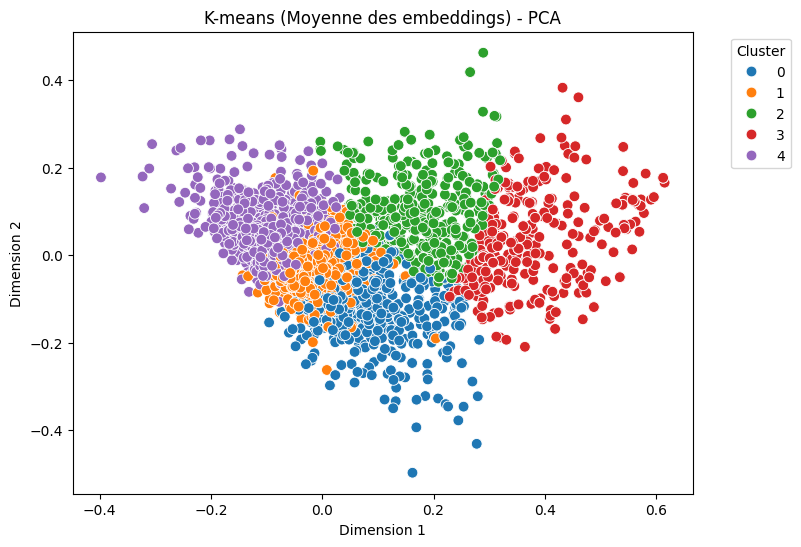

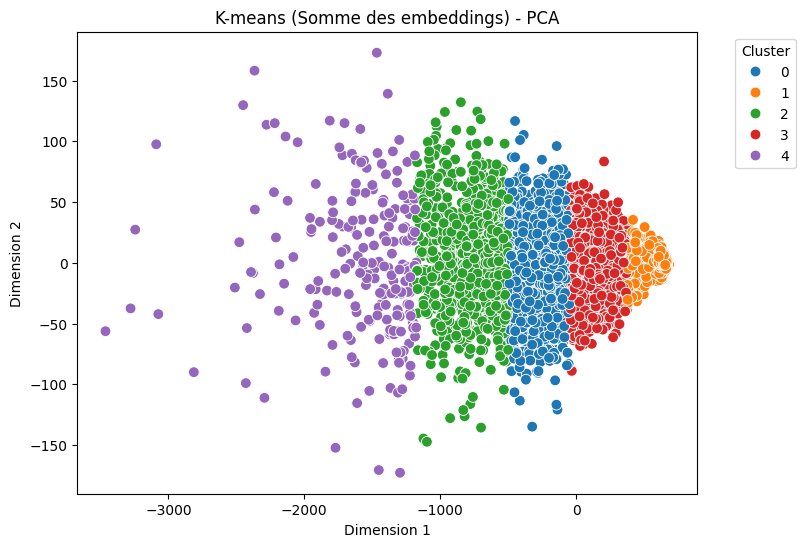

In [51]:

# --- Visualisation PCA
plot_clusters(X_mean_pca, clusters_mean, "K-means (Moyenne des embeddings) - PCA")
plot_clusters(X_sum_pca, clusters_sum, "K-means (Somme des embeddings) - PCA")

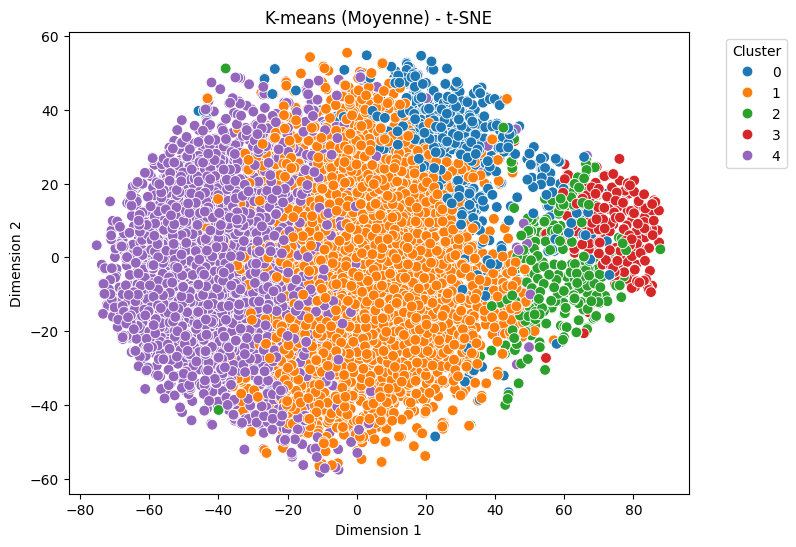

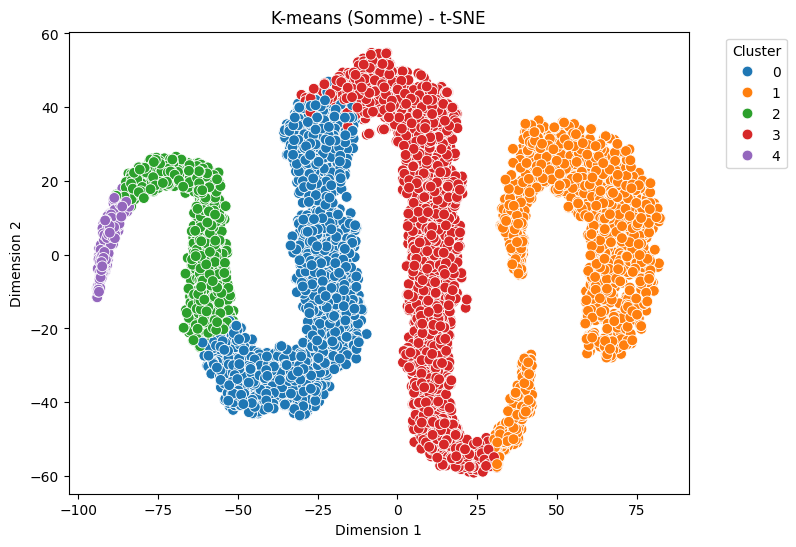

In [52]:

# --- Visualisation t-SNE
plot_clusters(X_mean_tsne, clusters_mean, "K-means (Moyenne) - t-SNE")
plot_clusters(X_sum_tsne, clusters_sum, "K-means (Somme) - t-SNE")

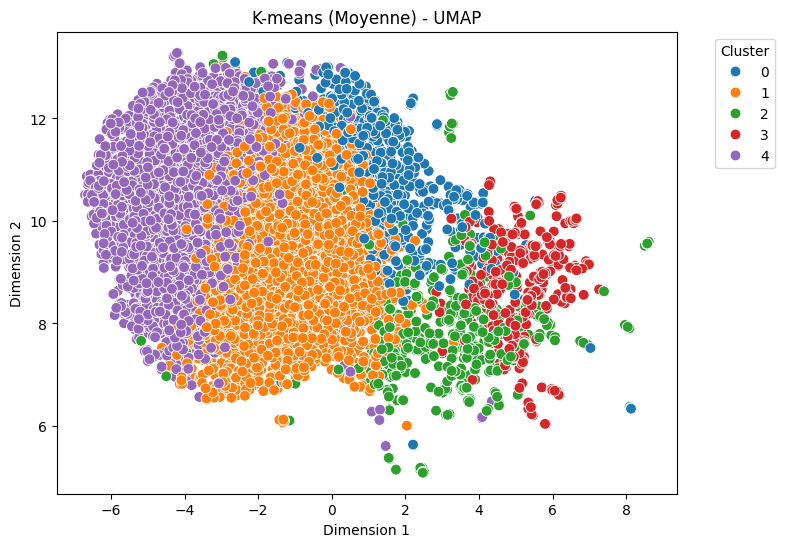

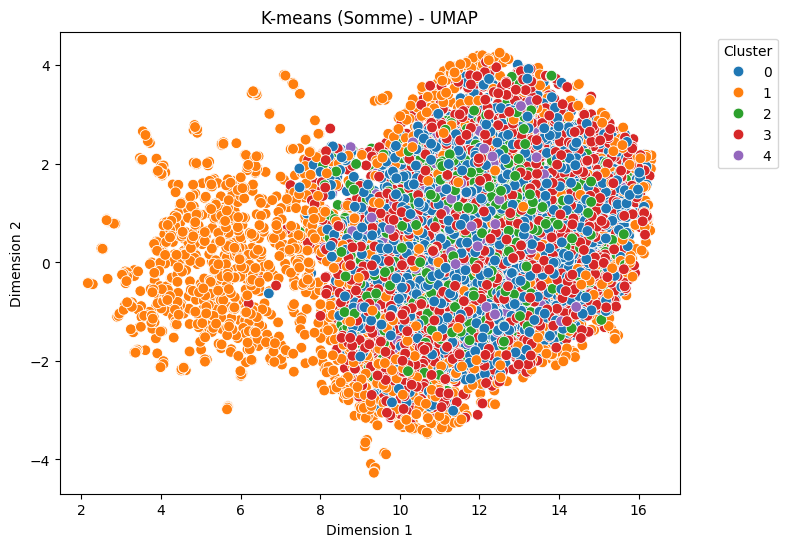

In [53]:

# --- Visualisation UMAP
plot_clusters(X_mean_umap, clusters_mean, "K-means (Moyenne) - UMAP")
plot_clusters(X_sum_umap, clusters_sum, "K-means (Somme) - UMAP")

# Évaluation : comparaison avec les vrais labels

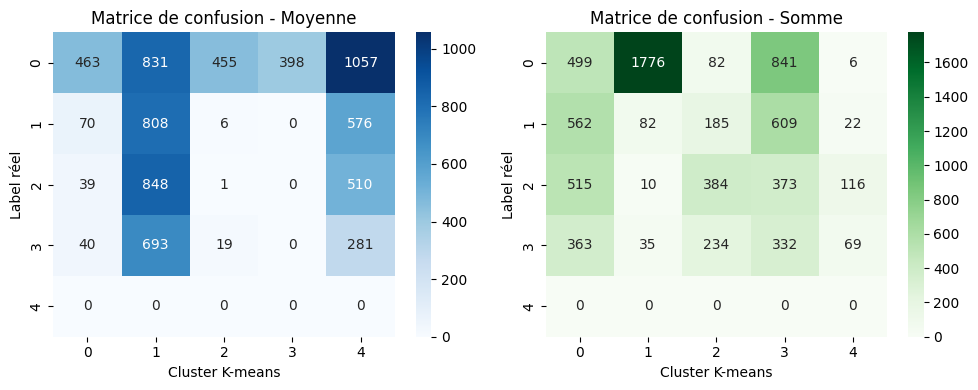

Indice RAND ajusté (moyenne) : -0.019673397501382042
Indice RAND ajusté (somme)   : 0.17387508013263947
NMI (moyenne) : 0.10933409808543702
NMI (somme)   : 0.17697852682294354


In [54]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score
# --- Matrices de confusion
conf_mean = confusion_matrix(df["label_id"], clusters_mean)
conf_sum  = confusion_matrix(df["label_id"], clusters_sum)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(conf_mean, annot=True, fmt='d', cmap="Blues")
plt.title("Matrice de confusion - Moyenne")
plt.xlabel("Cluster K-means")
plt.ylabel("Label réel")

plt.subplot(1,2,2)
sns.heatmap(conf_sum, annot=True, fmt='d', cmap="Greens")
plt.title("Matrice de confusion - Somme")
plt.xlabel("Cluster K-means")
plt.ylabel("Label réel")
plt.tight_layout()
plt.show()

# --- Indices de similarité
print("Indice RAND ajusté (moyenne) :", adjusted_rand_score(df["label_id"], clusters_mean))
print("Indice RAND ajusté (somme)   :", adjusted_rand_score(df["label_id"], clusters_sum))
print("NMI (moyenne) :", normalized_mutual_info_score(df["label_id"], clusters_mean))
print("NMI (somme)   :", normalized_mutual_info_score(df["label_id"], clusters_sum))

# **Exercice 5 : Réduction de dimensions comme étape de prétraitement**

L'objectif de cet exercice est d'utiliser la réduction de dimensions comme une étape de prétraitement pour compresser les données avant de procéder au clustering par k-means. Dans ce cas, le nombre de dimensions peut être supérieur à 2. Comparez ensuite les étiquettes réelles des données avec celles obtenues via k-means, à la fois visuellement et numériquement.

#### **Réduction de dimensions** :
   1. Appliquer les méthodes de réduction de dimensions (ACP et UMAP) sur vos données. Choisissez un nombre de dimensions supérieur à 2 pour la compression (par exemple 50, 100, etc).


#### **Clustering avec k-means** :
   1. Utiliser l'algorithme k-means sur les données compressées pour les regrouper en clusters.


#### **Visualisation 2D** :
   1. Visualiser les clusters avec ACP, UMAP et t-SNE..


#### **Comparaison des étiquettes** :
   1. Comparer les clusters obtenus avec les étiquettes réelles des données (colonne `topic_id`) en utilisant une matrice de confusion.   

In [ ]:
# A vous de jouer!

# **Exercice 6 : Entraînement d'un modèle Word2Vec**

#### **Expérimentez avec les paramètres :**
Tester différents paramètres pour entraîner des modèles Word2Vec, à la fois en mode skip-gram et CBOW.
#### **Calcul de la représentation des documents** :
Appliquer le modèle Word2Vec entrainé pour calculer la représentation vectorielle des documents dans votre corpus. Cela implique l'agrégation des vecteurs de mots pour chaque document en prenant la moyenne ou la somme.
#### **Réduction de dimension** :
Mettre en œuvre les méthodes de réduction de dimension sur vos documents (ACP et UMAP).
#### **Clustering avec K-means :**
Après la réduction de dimension, utiliser l'algorithme K-means pour regrouper les documents.


#### **Ressources pour vous aider :**
- Consultez la [documentation Gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#online-training-resuming-training) pour des orientations sur l'entraînement de modèles Word2Vec.


In [ ]:
from gensim.models import Word2Vec
import time


# Démarrer un chronomètre pour mesurer le temps d'entraînement.
start = time.time()

# Créer une instance du modèle Word2Vec.
# - vector_size=100: Chaque mot sera représenté par un vecteur de 100 dimensions.
# - window=6: Fenêtre contextuelle de 6 mots de chaque côté du mot cible.
# - min_count=2: Les mots doivent apparaître au moins 2 fois pour être considérés.
# - sg=1: Utiliser l'architecture skip-gram (sg=0 pour CBOW).
# - hs=0: Ne pas utiliser de softmax hiérarchique pour l'entraînement.
# - negative=5: Utiliser l'échantillonnage négatif avec 5 mots "négatifs".
my_w2v_model = Word2Vec(vector_size=100,
                        window=6,
                        min_count=2,
                        sg=1,
                        hs=0,
                        negative=5)

# Construire le vocabulaire à partir du corpus.
# corpus_iterable=wiki_corpus: Le corpus sur lequel entraîner le modèle.
corpus = # Votre corpus
my_w2v_model.build_vocab(corpus_iterable=corpus)

# Entraîner le modèle sur le corpus.
# total_examples=len(wiki_corpus): Le nombre total de phrases dans le corpus.
# epochs=10: Nombre de passages à travers le corpus pour l'entraînement.
my_w2v_model.train(corpus_iterable=corpus, total_examples=len(corpus), epochs=10)

# Calculer et afficher le temps total pris pour l'entraînement.
end = time.time()
print("le temps d'entraînement a été de : {} secondes".format(round(end - start, 2)))

In [ ]:
# A vous de jouer

# **Exercice 7 : Entraînement d'un modèle fastText**

En suivant les étapes mentionnées dans l'exercice 6, procéder au clustering en utilisant fastText.

In [ ]:
# A vous de jouer

# **Instructions pour le rendu**

Pour le rendu, vous devez le déposer sur le drive suivant : https://drive.google.com/drive/folders/1713qEJGTrIFwLQglZpxD3GGnqJxcfSRn?usp=drive_link(URL_DU_DRIVE).


### **Veuillez préciser les noms et prénoms des monomes/binomes dans la première cellule du notebook.**
